### Упражнение по визуализации

In [1]:
# отключаем предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np

from datetime import datetime

# задаем некоторые настройки pandas, регулирующие
# формат вывода
# pd.set_option('display.notebook_repr_html', False)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
# pd.set_option('display.width', None)

In [2]:
# данные предобработаны в другом файле(даты надо парсить отдельно)
import json
data_types = None
with open('types.json', 'r') as f:
    data_types = json.load(f)
special = ['Date Reported', 'Date Occurred','Time Occurred','Full_Time_Occurred']
for dt in special:
    data_types[dt] = 'object'

In [3]:
gl = pd.read_csv('LA_crime_compressed.csv', dtype=data_types,parse_dates=special, infer_datetime_format=True)
gl.head()

Unnamed: 0  DR Number Date Reported Date Occurred       Time Occurred  \
0           0    1208575    2013-03-14    2013-03-11 1900-01-01 18:00:00   
1           1  102005556    2010-01-25    2010-01-22 1900-01-01 23:00:00   
2           2        418    2013-03-19    2013-03-18 1900-01-01 20:30:00   
3           3  101822289    2010-11-11    2010-11-10 1900-01-01 18:00:00   
4           4   42104479    2014-01-11    2014-01-04 1900-01-01 23:00:00   

  Area ID    Area Name  Reporting District  Crime Code  \
0      12  77th Street                1241         626   
1      20      Olympic                2071         510   
2      18    Southeast                1823         510   
3      18    Southeast                1803         510   
4      21      Topanga                2133         745   

                     Crime Code Description  ... Status Description  \
0         INTIMATE PARTNER - SIMPLE ASSAULT  ...        Adult Other   
1                          VEHICLE - STOLEN  ...        Invest Cont   
2                          VEHICLE - STOLEN  ...        Invest Cont   
3                          VEHICLE - STOLEN  ...        Invest Cont   
4  VANDALISM - MISDEAMEANOR ($399 OR UNDER)  ...        Invest Cont   

   Crime Code 1 Crime Code 2 Crime Code 3  Crime Code 4  \
0           626            0            0             0   
1           510            0            0             0   
2           510            0            0             0   
3           510            0            0             0   
4           745            0            0             0   

                                   Address  Cross Street  \
0  6300    BRYNHURST                    AV           NaN   
1                                 VAN NESS          15TH   
2   200 E  104TH                        ST           NaN   
3                                     88TH          WALL   
4  7200    CIRRUS                       WY           NaN   

              Location   Full_Time_Occurred    Weekday  
0  (33.9829, -118.3338) 2013-03-11 18:00:00     Monday  
1  (34.0454, -118.3157) 2010-01-22 23:00:00     Friday  
2   (33.942, -118.2717) 2013-03-18 20:30:00     Monday  
3  (33.9572, -118.2717) 2010-11-10 18:00:00  Wednesday  
4  (34.2009, -118.6369) 2014-01-04 23:00:00   Saturday  

[5 rows x 29 columns]

In [4]:
gl.dtypes

Unnamed: 0                         int64
DR Number                          int64
Date Reported             datetime64[ns]
Date Occurred             datetime64[ns]
Time Occurred             datetime64[ns]
Area ID                         category
Area Name                         object
Reporting District                uint16
Crime Code                         int64
Crime Code Description          category
MO Codes                          object
Victim Age                         uint8
Victim Sex                      category
Victim Descent                  category
Premise Code                      uint16
Premise Description             category
Weapon Used Code                  uint16
Weapon Description                object
Status Code                     category
Status Description              category
Crime Code 1                      uint16
Crime Code 2                      uint16
Crime Code 3                      uint16
Crime Code 4                      uint16
Address         

1.Стилизировать столбец таблицы общего количества преступлений по дням недели.

In [5]:
# сделаем сводные таблицы для визуализации данных
# Количество преступлений в каждом районе по дням недели
days_and_crimes = gl.pivot_table('Full_Time_Occurred',index='Area Name',columns='Weekday',aggfunc='count').fillna(value=0)
days_and_crimes = days_and_crimes[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']]
days_and_crimes.head()


Weekday      Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday
Area Name                                                                  
77th Street   17163    16480      16749     16127   17625     16825   16791
Central       10060     9965       9908     10205   11220     11275   10192
Devonshire    11149    11162      11327     11383   12834     10891   10043
Foothill       9333     8969       9236      8959   10158      9208    8969
Harbor        10509    10354      10555     10499   11753     11081   10452

In [6]:
gl['Year'] = gl['Date Occurred'].dt.strftime("%Y")

In [7]:
# Количество преступлений в каждом районе по годам
years_and_crimes = gl.pivot_table('Full_Time_Occurred',index='Area Name',columns='Year',aggfunc='count').fillna(value=0)

2.Построить распределение количества преступлений по дням недедли в зависимости от района:

In [8]:
days_and_crimes.sum()

Weekday
Monday       241094
Tuesday      236998
Wednesday    239585
Thursday     237834
Friday       261154
Saturday     243302
Sunday       232089
dtype: int64

In [9]:
import matplotlib.pyplot as plt

#offline.init_notebook_mode()
%matplotlib inline

3.линейна диаграмма

([<matplotlib.axis.XTick at 0x14dd12f8>,
 [Text(0, 0, '77th Street'),
  Text(0, 0, 'Central'),
  Text(0, 0, 'Devonshire'),
  Text(0, 0, 'Foothill'),
  Text(0, 0, 'Harbor'),
  Text(0, 0, 'Hollenbeck'),
  Text(0, 0, 'Hollywood'),
  Text(0, 0, 'Mission'),
  Text(0, 0, 'N Hollywood'),
  Text(0, 0, 'Newton'),
  Text(0, 0, 'Northeast'),
  Text(0, 0, 'Olympic'),
  Text(0, 0, 'Pacific'),
  Text(0, 0, 'Rampart'),
  Text(0, 0, 'Southeast'),
  Text(0, 0, 'Southwest'),
  Text(0, 0, 'Topanga'),
  Text(0, 0, 'Van Nuys'),
  Text(0, 0, 'West LA'),
  Text(0, 0, 'West Valley'),
  Text(0, 0, 'Wilshire')])

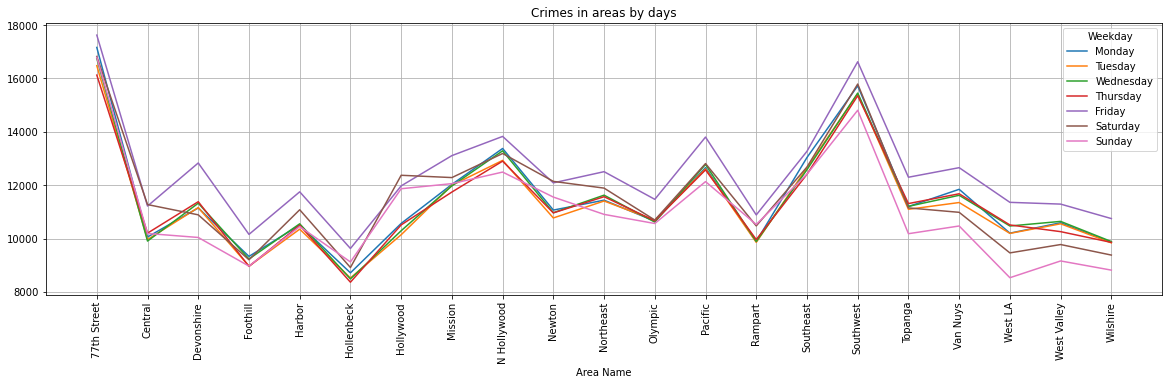

In [10]:
crimes_show = days_and_crimes.plot(figsize=(20,5),rot=90)
crimes_show.set_title("Crimes in areas by days")
crimes_show.grid(True)
plt.xticks(range(len(days_and_crimes.index)), days_and_crimes.index)

4.гистограмма по дням(2 версии)

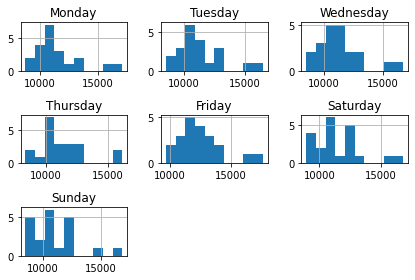

In [11]:
days_and_crimes.hist()
plt.tight_layout()

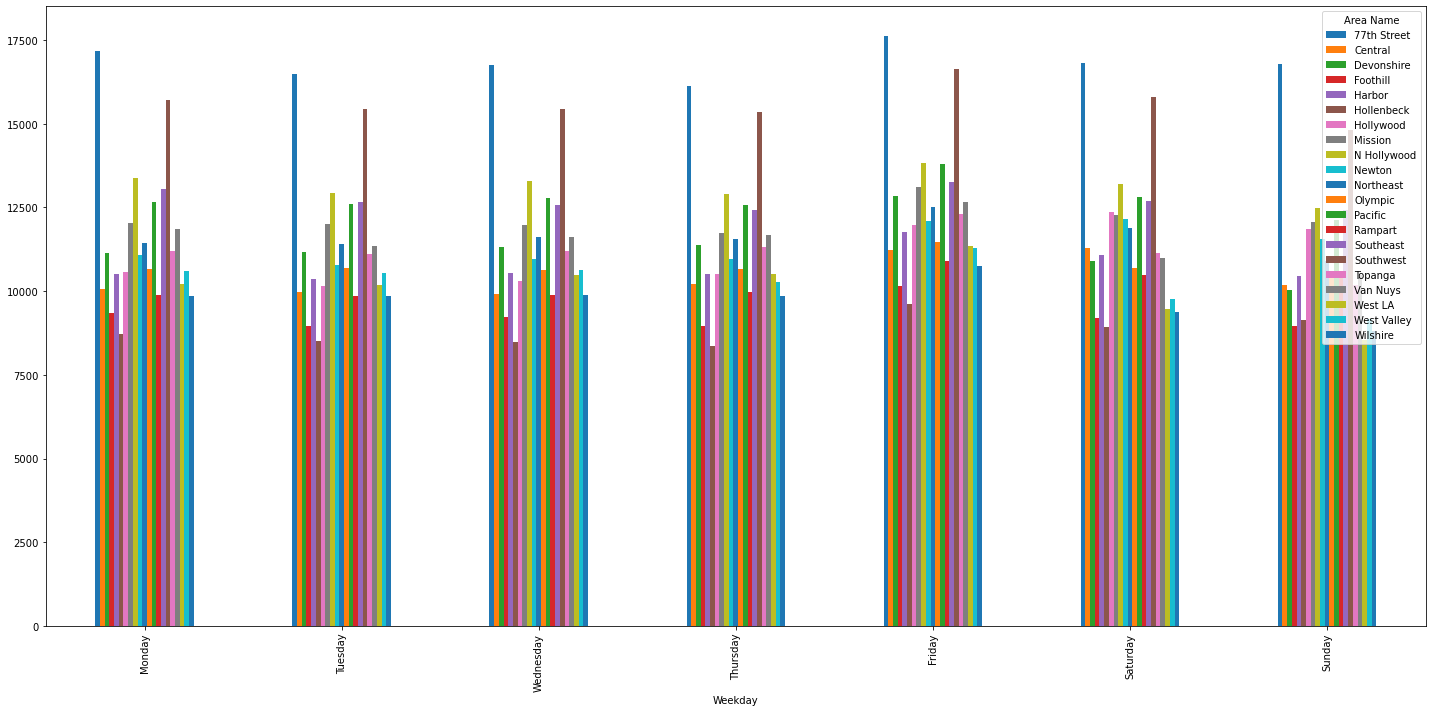

In [12]:
days_and_crimes.transpose().plot(kind='bar',figsize=(20,10))
plt.tight_layout()

5.столбчатая диаграмма накопления ( stacked bar chart);

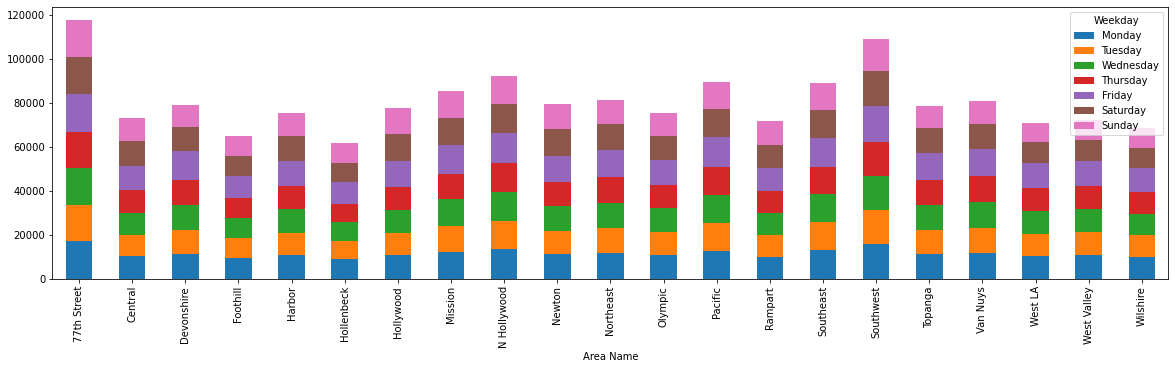

In [13]:
days_and_crimes.plot(kind='bar',stacked=True, figsize=(20,5))

6.площадная диаграмма (стыковачная и нестыковочная;

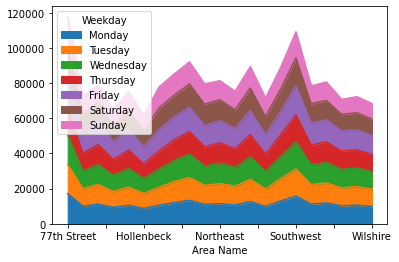

In [14]:
days_and_crimes.plot(kind='area')

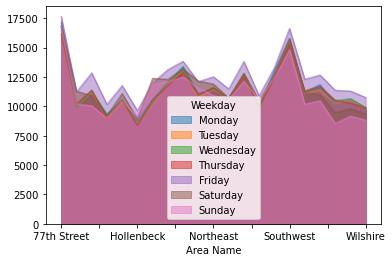

In [15]:
days_and_crimes.plot(kind='area',stacked=False)

7.диаграмма рассеяния количества преступлений по дням недели (два графика scatter_matrix и pairplot);

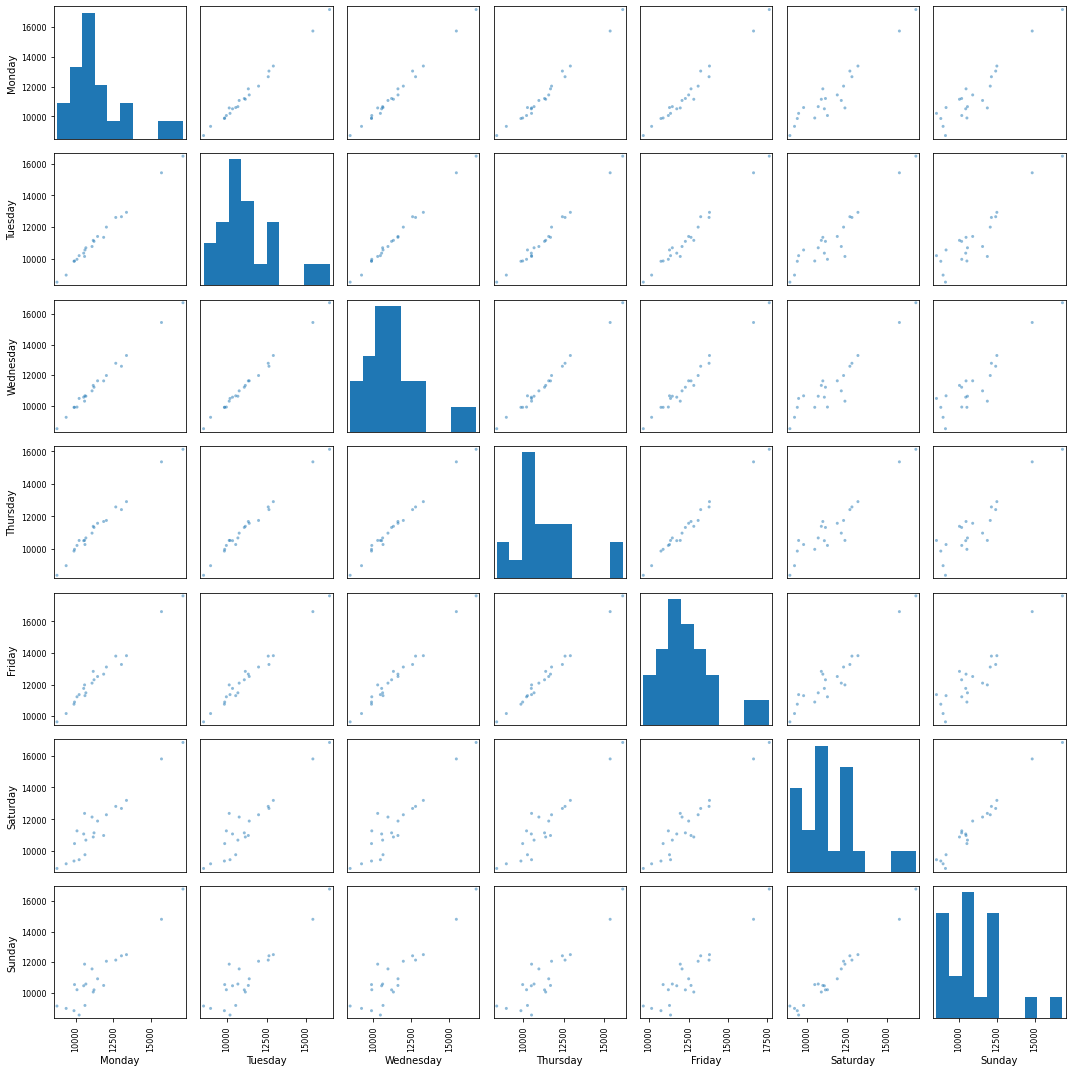

In [16]:
pd.plotting.scatter_matrix(days_and_crimes,figsize=(15,15))
plt.tight_layout()

In [17]:
import seaborn as sns
%config InlineBackend.figure_format = 'png' 

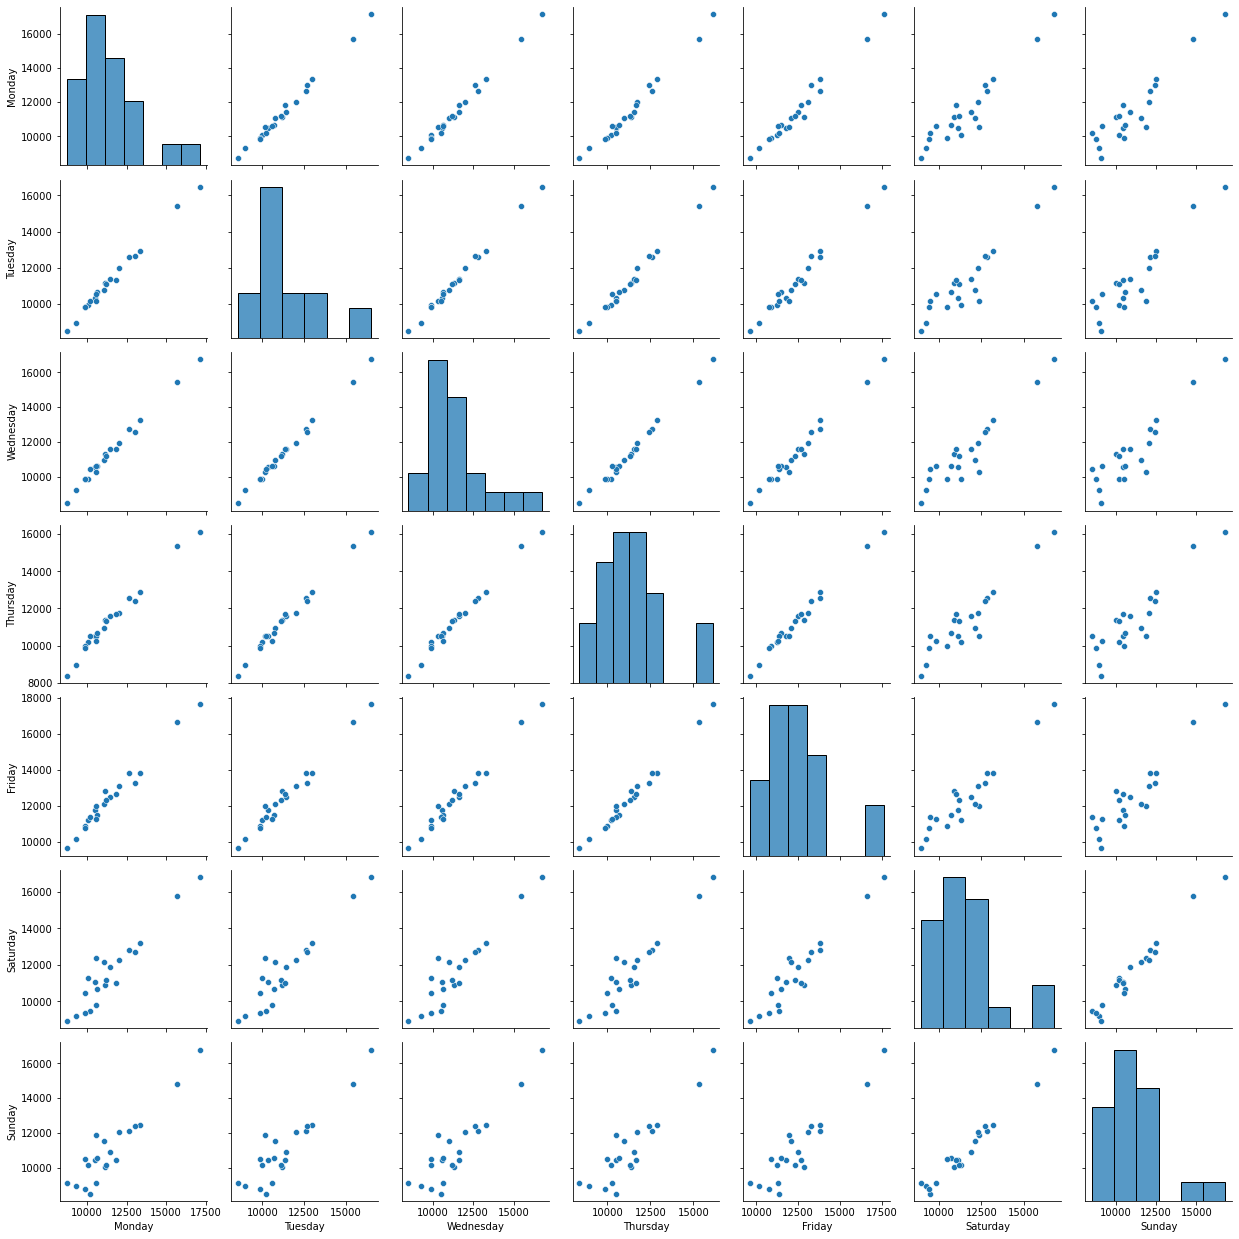

In [18]:

sns_plot = sns.pairplot(days_and_crimes)

8.распределение количества преступлений в любой день недели (например:пятница)

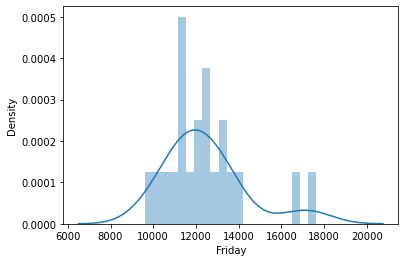

In [19]:
sns.distplot(days_and_crimes.Friday,bins=len(days_and_crimes.index))

9.гистограмма распределения количества преступлений в зависимости от района

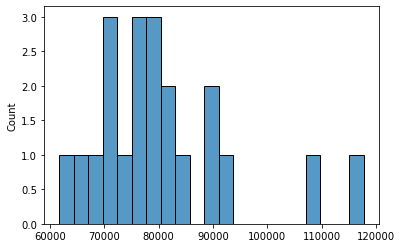

In [20]:
sns.histplot(days_and_crimes.sum(axis=1),bins=len(days_and_crimes.index))

10.распределение количества преступлений за любой год (например: 2010 год);

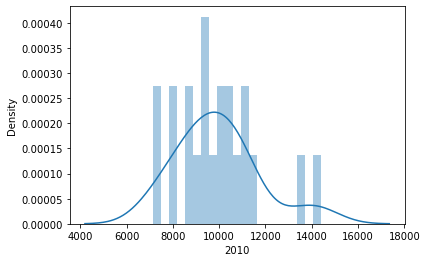

In [21]:
sns.distplot(years_and_crimes['2010'],bins=len(years_and_crimes.index))

11.показать через jointplot динамику изменений количества преступлений в сравнении 2010 и 2017 года

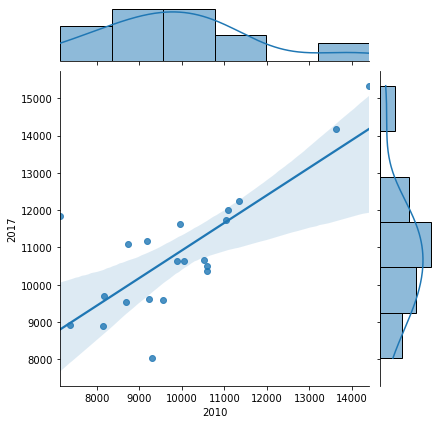

In [22]:
sns.jointplot(x='2010', y='2017', 
              data=years_and_crimes, kind='reg');

12.годовая динамика изменения количества преступлений по районам (линейный график  с легендами и удобным масштабом).

([<matplotlib.axis.XTick at 0x234f6fa0>,
 [Text(0, 0, '77th Street'),
  Text(0, 0, 'Central'),
  Text(0, 0, 'Devonshire'),
  Text(0, 0, 'Foothill'),
  Text(0, 0, 'Harbor'),
  Text(0, 0, 'Hollenbeck'),
  Text(0, 0, 'Hollywood'),
  Text(0, 0, 'Mission'),
  Text(0, 0, 'N Hollywood'),
  Text(0, 0, 'Newton'),
  Text(0, 0, 'Northeast'),
  Text(0, 0, 'Olympic'),
  Text(0, 0, 'Pacific'),
  Text(0, 0, 'Rampart'),
  Text(0, 0, 'Southeast'),
  Text(0, 0, 'Southwest'),
  Text(0, 0, 'Topanga'),
  Text(0, 0, 'Van Nuys'),
  Text(0, 0, 'West LA'),
  Text(0, 0, 'West Valley'),
  Text(0, 0, 'Wilshire')])

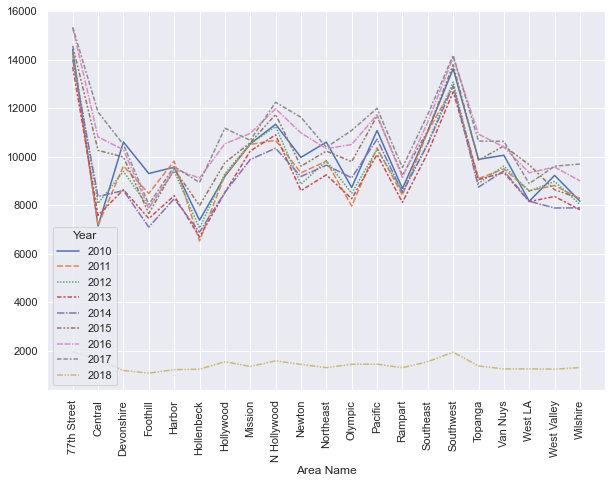

In [23]:
sns.set(rc={'figure.figsize':(10,7)})
sns.lineplot(data=years_and_crimes)
plt.xticks(range(len(days_and_crimes.index)), days_and_crimes.index,rotation = 90)

Анализ преступлений в заданном районе: 77th Street

In [24]:
street77 = gl[gl['Area Name']=='77th Street']
street77.head()

Unnamed: 0  DR Number Date Reported Date Occurred       Time Occurred  \
0            0    1208575    2013-03-14    2013-03-11 1900-01-01 18:00:00   
12          12  121207315    2013-02-22    2013-02-13 1900-01-01 12:00:00   
13          13  121215506    2013-06-20    2013-06-07 1900-01-01 12:00:00   
92          92  101204986    2010-01-14    2010-01-13 1900-01-01 20:00:00   
97          97  101209042    2010-03-07    2010-03-07 1900-01-01 15:30:00   

   Area ID    Area Name  Reporting District  Crime Code  \
0       12  77th Street                1241         626   
12      12  77th Street                1266         440   
13      12  77th Street                1268         763   
92      12  77th Street                1266         510   
97      12  77th Street                1258         510   

                Crime Code Description  ... Crime Code 1  Crime Code 2  \
0    INTIMATE PARTNER - SIMPLE ASSAULT  ...          626             0   
12  THEFT PLAIN - PETTY ($950 & UNDER)  ...          440           998   
13                            STALKING  ...          763             0   
92                    VEHICLE - STOLEN  ...          510             0   
97                    VEHICLE - STOLEN  ...          510             0   

   Crime Code 3 Crime Code 4                                  Address  \
0             0            0  6300    BRYNHURST                    AV   
12            0            0                                     82ND   
13            0            0   100 W  82ND                         ST   
92            0            0                         8200 S  BROADWAY   
97            0            0                                     MAIN   

   Cross Street             Location   Full_Time_Occurred    Weekday  Year  
0           NaN  (33.9829, -118.3338) 2013-03-11 18:00:00     Monday  2013  
12     BROADWAY  (33.9651, -118.2783) 2013-02-13 12:00:00  Wednesday  2013  
13          NaN  (33.9651, -118.2754) 2013-06-07 12:00:00     Friday  2013  
92          NaN  (33.9651, -118.2783) 2010-01-13 20:00:00  Wednesday  2010  
97         73RD  (33.9738, -118.2739) 2010-03-07 15:30:00     Sunday  2010  

[5 rows x 30 columns]

In [25]:
street77_crimes_days = street77.pivot_table('Full_Time_Occurred',index='Weekday',columns='Crime Code',
                                            aggfunc='count').fillna(value=0)
street77_crimes_days = street77_crimes_days.transpose()[['Monday','Tuesday','Wednesday',
                                                         'Thursday','Friday','Saturday','Sunday']].transpose()
street77_crimes_days.head()


Crime Code   110   121   122     210    220     230   231   235    236   237  \
Weekday                                                                        
Monday      49.0  90.0  13.0  1242.0  149.0  1340.0  10.0  51.0  145.0  64.0   
Tuesday     50.0  72.0  10.0  1151.0  177.0  1238.0  22.0  58.0  136.0  47.0   
Wednesday   51.0  98.0   5.0  1212.0  164.0  1260.0  17.0  47.0  144.0  56.0   
Thursday    45.0  74.0   4.0  1138.0  136.0  1213.0   7.0  53.0  137.0  55.0   
Friday      41.0  95.0  12.0  1245.0  159.0  1320.0  22.0  34.0  141.0  46.0   

Crime Code  ...   940   943  944    946  948  949  950  951  954    956  
Weekday     ...                                                          
Monday      ...  15.0   8.0  1.0  187.0  0.0  6.0  0.0  3.0  0.0  123.0  
Tuesday     ...  15.0  10.0  1.0  195.0  0.0  3.0  1.0  2.0  2.0  103.0  
Wednesday   ...  16.0  12.0  1.0  214.0  0.0  1.0  1.0  2.0  9.0   95.0  
Thursday    ...  17.0  15.0  1.0  204.0  2.0  3.0  0.0  1.0  0.0  100.0  
Friday      ...  14.0   9.0  0.0  203.0  0.0  3.0  2.0  2.0  2.0  120.0  

[5 rows x 128 columns]

13.количество отдельно взятого вида преступления(Crime code = 230) распределенного по дням недели;


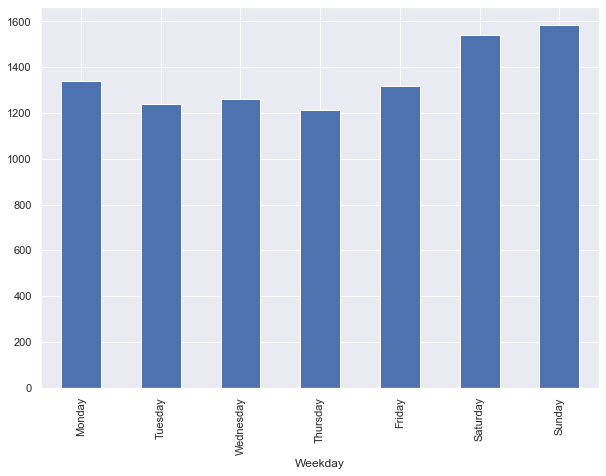

In [26]:
street77_crimes_days[230].plot(kind='bar')

14.построить таблицу (вид преступления по дням недели) и подсветить максимальные и минимальные значения для каждого вида преступления разным цветом;

In [27]:
import random
def highlight_max(s):
    '''
    highlight the maximum in a Series or DataFrame
    '''
    is_max = s == s.max()
    return ['background-color:red' if v else '' for v in is_max]
def highlight_min(s):
    '''
    highlight the maximum in a Series or DataFrame
    '''
    is_max = s == s.min()
    return ['background-color:yellow' if v else '' for v in is_max]

In [28]:
street77_crimes_days.style.apply(highlight_max).apply(highlight_min)

15.сравнение распределения 20 наиболее часто встречающихся преступлений по дня недели для заданного района (показать через boxplot);

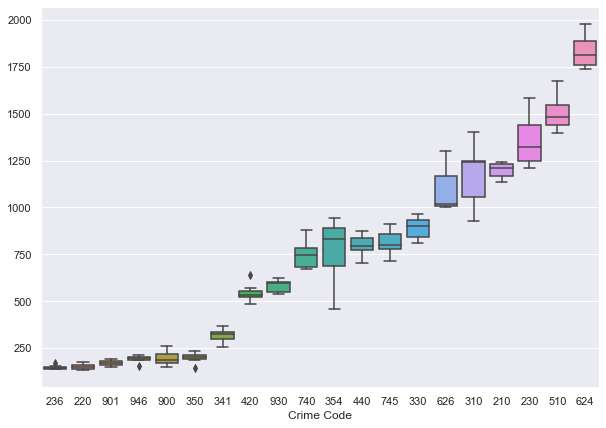

In [29]:
top20_at_street77 = street77_crimes_days.sum().sort_values()[-20:].index
sns.boxplot(data = street77_crimes_days[top20_at_street77])

16.проанализировать коэфициент корреляции вида преступления и дня недели (результат в виде heatmap на которой отображено только корреляция вида преступления от дня недели)

In [30]:
# подготовим выборки для проверки на корреляцию - метки 1 - такое-то преступление в такой то день
street77_for_corr = pd.DataFrame()
for i in street77['Crime Code'].unique():
    street77_for_corr[i] = street77['Crime Code'] == i
    street77_for_corr[i] = street77_for_corr[i].astype('uint8')
for i in street77['Weekday'].unique():
    street77_for_corr[i] = street77['Weekday']== i
    street77_for_corr[i] = street77_for_corr[i].astype('uint8')

In [31]:
street77_for_corr

626  440  763  510  310  330  888  946  940  812  ...  475  830  760  \
0          1    0    0    0    0    0    0    0    0    0  ...    0    0    0   
12         0    1    0    0    0    0    0    0    0    0  ...    0    0    0   
13         0    0    1    0    0    0    0    0    0    0  ...    0    0    0   
92         0    0    0    1    0    0    0    0    0    0  ...    0    0    0   
97         0    0    0    1    0    0    0    0    0    0  ...    0    0    0   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1689744    1    0    0    0    0    0    0    0    0    0  ...    0    0    0   
1689745    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
1689746    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
1689747    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
1689748    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   

         Monday  Wednesday  Friday  Sunday  Saturday  Tuesday  Thursday  
0             1          0       0       0         0        0         0  
12            0          1       0       0         0        0         0  
13            0          0       1       0         0        0         0  
92            0          1       0       0         0        0         0  
97            0          0       0       1         0        0         0  
...         ...        ...     ...     ...       ...      ...       ...  
1689744       0          0       1       0         0        0         0  
1689745       0          0       0       0         0        1         0  
1689746       0          0       0       0         0        0         1  
1689747       0          0       1       0         0        0         0  
1689748       0          0       1       0         0        0         0  

[117760 rows x 135 columns]

In [32]:
weekdays = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
corr_matrix = street77_for_corr.corr(method='spearman')[weekdays].drop(weekdays)
corr_matrix.head()

Monday   Tuesday  Wednesday  Thursday    Friday  Saturday    Sunday
626  0.002502 -0.007116  -0.007319 -0.003477 -0.014119  0.009604  0.020060
440  0.006652  0.005096  -0.000056  0.002332  0.001326 -0.004572 -0.010782
763  0.000038 -0.000142   0.003302 -0.002085  0.001106  0.001042 -0.003318
510 -0.004336 -0.003378  -0.004296 -0.003969  0.002365  0.014787 -0.001290
310 -0.002264  0.010158   0.007920  0.011760  0.016470 -0.021320 -0.022736

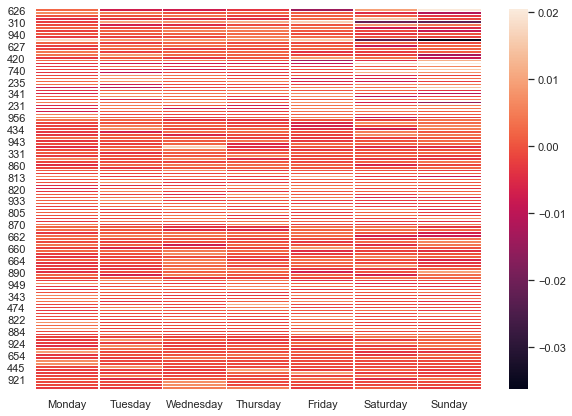

In [33]:
sns.heatmap(corr_matrix, linewidths=0.5)
sns.set(rc={'figure.figsize':(30,30)})


17.линейный график коэффициент корреляции дня недели и вида преступления в абсолютных значениях

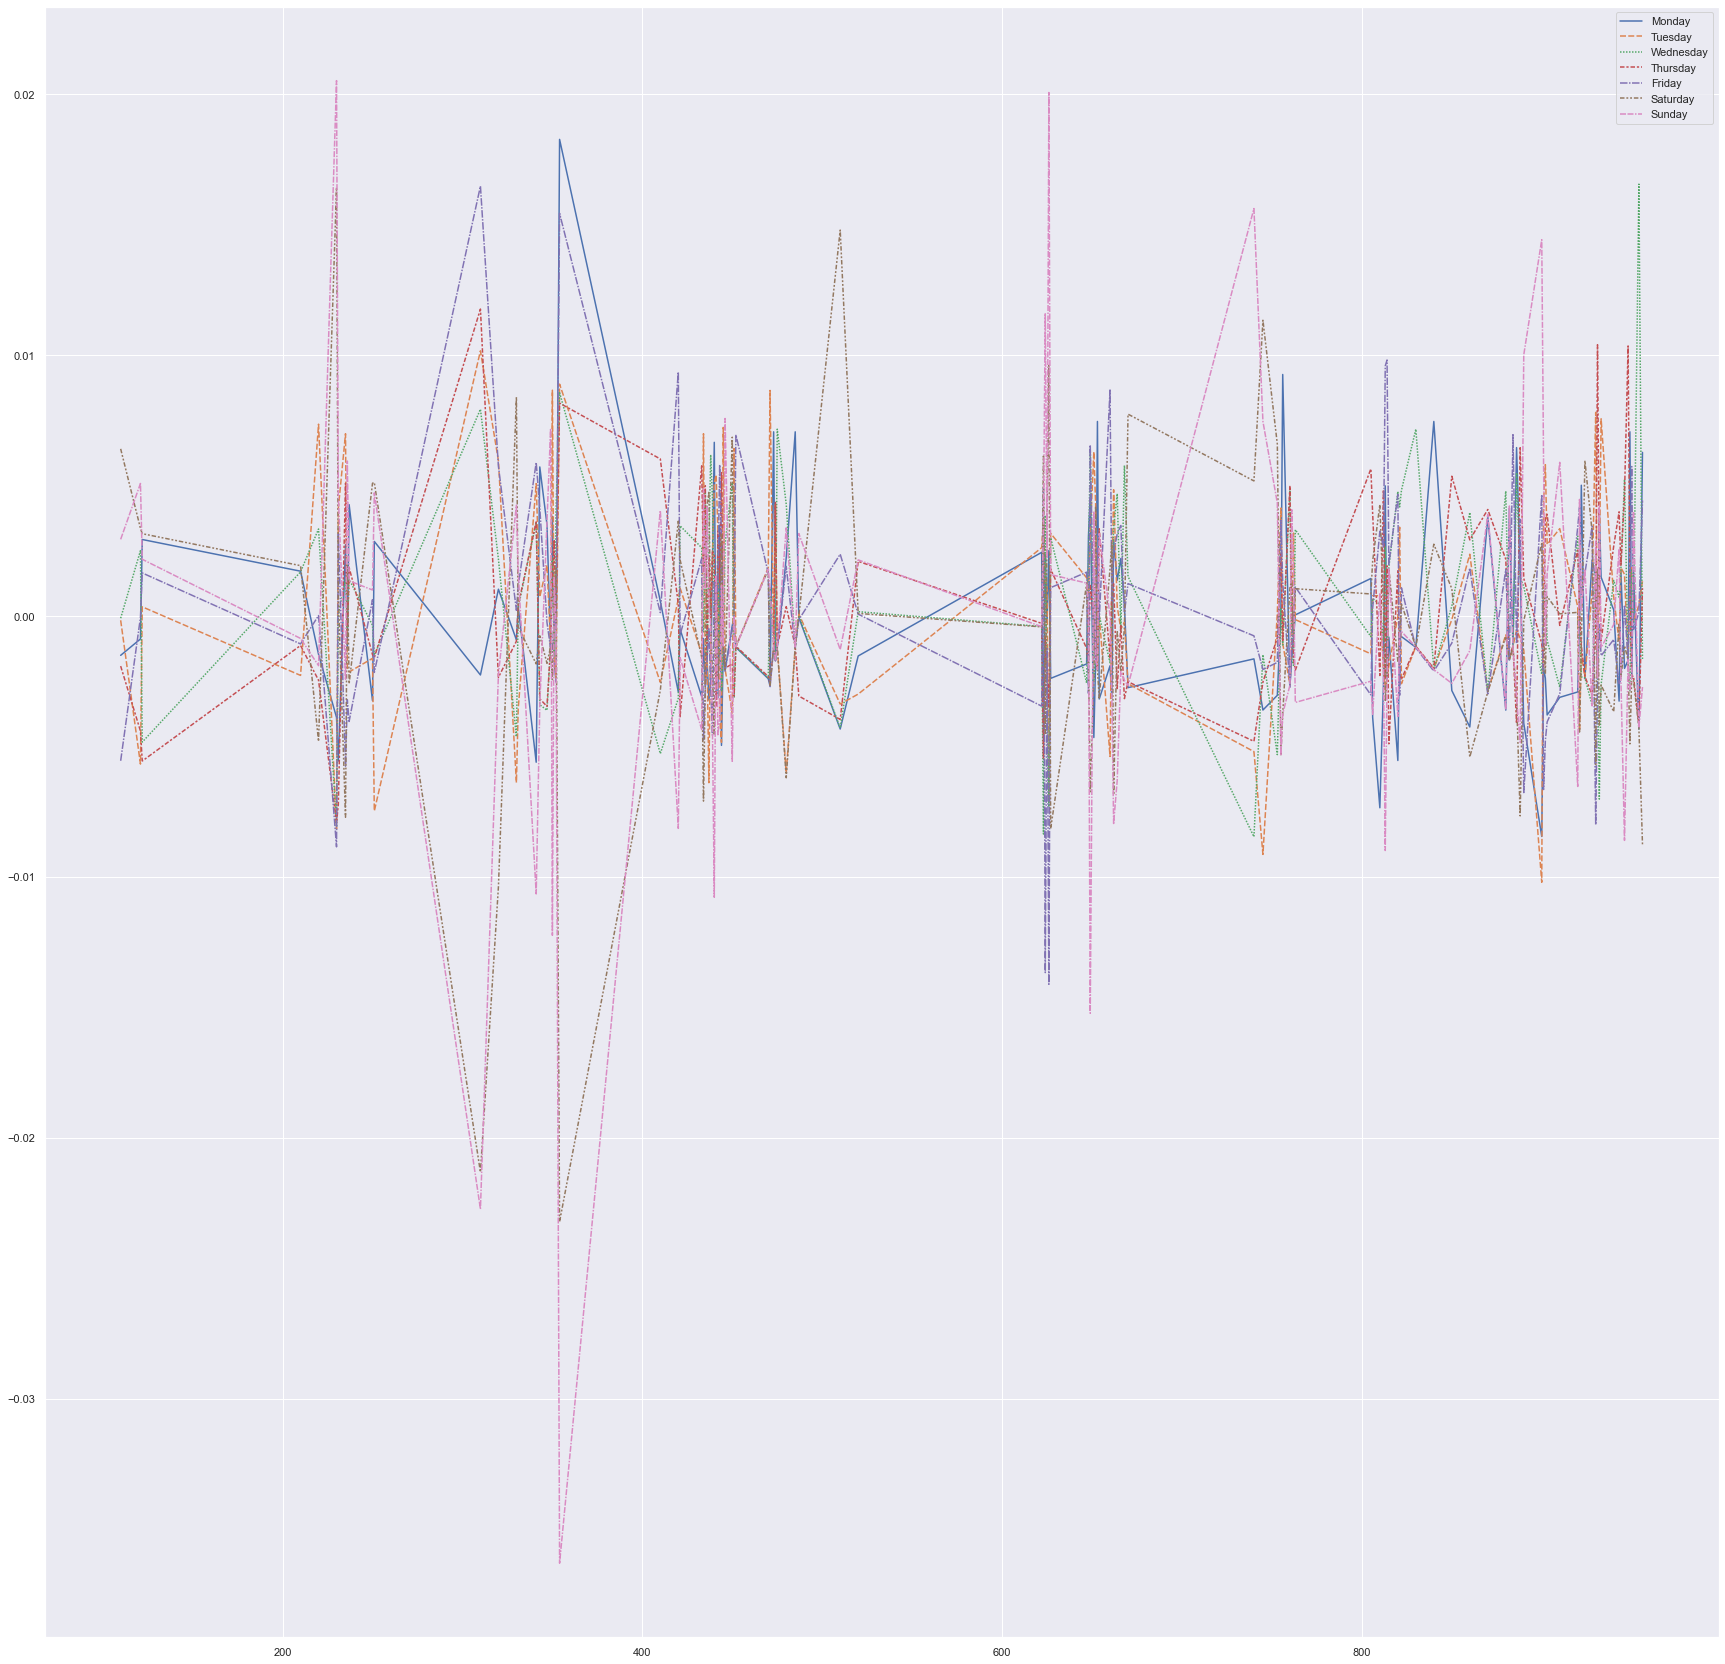

In [34]:
sns.lineplot(data=corr_matrix)

Сравнение количества преступлений по дням недели и районам:

In [35]:
import plotly
import matplotlib.pyplot as plt
import plotly.offline as offline
import plotly.graph_objs as go


18.построить линейный график для трех любых районов;

In [36]:
streets = ['77th Street','Newton','Mission']
data3 = []
for street in streets:
    trace0 = go.Scatter(
        x=days_and_crimes.columns,y=days_and_crimes.loc[street],name=street)
    data3.append(trace0)
    
fig = go.Figure(data=data3)
offline.iplot(fig, show_link=False)

19.построить линейный график для всех районов сразу.

In [37]:
data = []
for street in days_and_crimes.index:
    trace0 = go.Scatter(
        x=days_and_crimes.columns,
        y=days_and_crimes.loc[street],
        name=street)
    data.append(trace0)
    
fig = go.Figure(data=data)
offline.iplot(fig, show_link=False)

Доля преступлений в конкретном районе от общего количества
20.Bar график для всех районов по всей статистики;

In [38]:
all_crimes = len(gl['Full_Time_Occurred'])
all_crimes

1692056

In [39]:
years_and_crimes
years_and_crimes['Total'] = years_and_crimes.sum(axis=1)
total_crimes = years_and_crimes['Total'].sum()

In [40]:
trace = go.Bar(
    x=years_and_crimes.index,
    y=years_and_crimes.Total/total_crimes*100,
    name='Global Sales',
    orientation = 'v'
)
fig = go.Figure(data=trace,layout={'title':'Frequency by street'})

offline.iplot(fig, show_link=False)

21.Bar график для всех районов по годам

In [41]:
years_and_crimes = years_and_crimes.drop('Total',axis=1)


In [42]:
years = gl['Year'].unique()
years = np.sort(years)

In [43]:
freq_years =  years_and_crimes.copy()
for year in years:
    freq_years[year] = years_and_crimes[year]/years_and_crimes[year].sum()*100

In [44]:

data_by_year = []
for street in freq_years.index:
    trace0 = go.Bar(
        x=years,
        y=freq_years.loc[street],
        name=street,
        orientation = 'v'
    )
    data_by_year.append(trace0)
fig = go.Figure(data=data_by_year,layout={'title':'Percenatge of crimes by year full area'})
offline.iplot(fig, show_link=False)


22.box график статистики всех преступлений в распределении по годам

In [45]:
data_box_plot = []
for year in years:
    data_box_plot.append(
        go.Box(y=years_and_crimes[year],
              name = year)
    )
offline.iplot(data_box_plot, show_link = False)

Интерактивный график:

In [46]:
def get_num_columns(dfs):
    if len(dfs) == 0:
        return 0
    return sum(list(map(lambda x: len(x.columns), dfs)))

def plotly_dropdown_line_plots(slices, title):
    slices_lst = list(slices.keys())
    N_slices = len(slices_lst)

    traces_dm = []
    buttons = []
    
    for i in range(N_slices):
        slice = slices_lst[i]
        df = slices[slice]
        
        dfs_before = list(slices.values())[:i]
        dfs_after = list(slices.values())[i+1:]

        num_before = get_num_columns(dfs_before)
        num_after = get_num_columns(dfs_after)
        
        for col in df.columns:
            traces_dm.append(
                go.Scatter(
                    x = df.index,
                    y = df[col],
                    name = col,
                    visible = (i == 0),
                    mode = 'lines'
                )
            )

        buttons.append(
            dict(
                label = slice,
                method = 'restyle',
                args = ['visible', [False]*num_before + [True]*len(df.columns) + [False]*num_after]
            )
        )
    layout = go.Layout(
        title = title,
        updatemenus = [
            dict(
                x = -0.05,
                y = 1,
                yanchor = 'top',
                buttons = buttons,
            )
        ]
    )
    fig = go.Figure(data=traces_dm, layout=layout)
    offline.iplot(fig, show_link=False)

23.количество преступлений от дня недели для отдельного района;

In [47]:
area_slices = {}

In [48]:
for area in days_and_crimes.index:
    area_slices[area] = gl[gl['Area Name']==area].groupby('Weekday')[['Full_Time_Occurred']].count()
    area_slices[area] = area_slices[area].rename(index={0:'Monday',1:'Thuesday',2:'Wendsday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'})


In [49]:
plotly_dropdown_line_plots(area_slices, title = 'Crimes by day in every area')

24.количество преступлений от района для от дельного дня недели

In [50]:
weekday_slice = {}
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
for day in days:
    weekday_slice[day] = gl[gl['Weekday'] == day].groupby('Area Name')[['Full_Time_Occurred']].count()

In [51]:

plotly_dropdown_line_plots(weekday_slice, title = 'Crimes by area in every day')